<a href="https://colab.research.google.com/github/bibidemarezoyens/LB/blob/main/plotjes_voor_rowrowrow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
complete_df = pd.read_csv('ploeg_final_df.csv')
print(complete_df.head())

   ervaring  500_split  2k tijd  binary_trainingtype  binary_geslacht  \
0         1      104.6    379.9                    0                0   
1         1      104.7    379.9                    0                0   
2         1      104.3    379.9                    0                0   
3         1      104.0    379.9                    0                0   
4         1      104.1    379.9                    0                0   

   binary_gewichtsklasse  binary_ploeg  
0                      1             0  
1                      1             0  
2                      1             0  
3                      1             0  
4                      1             0  


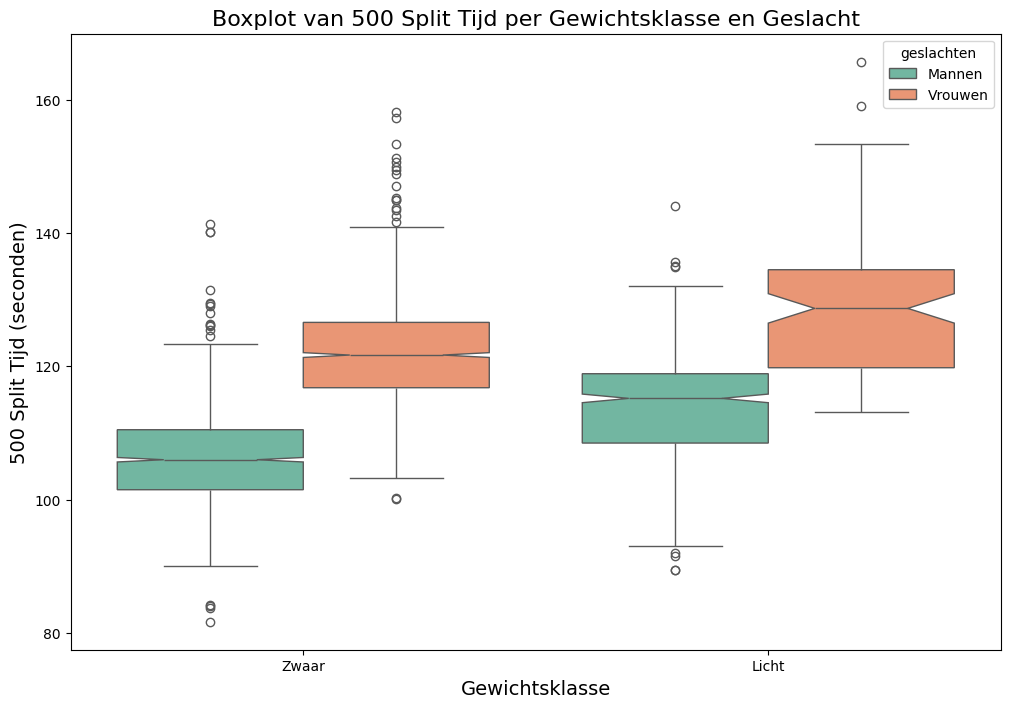

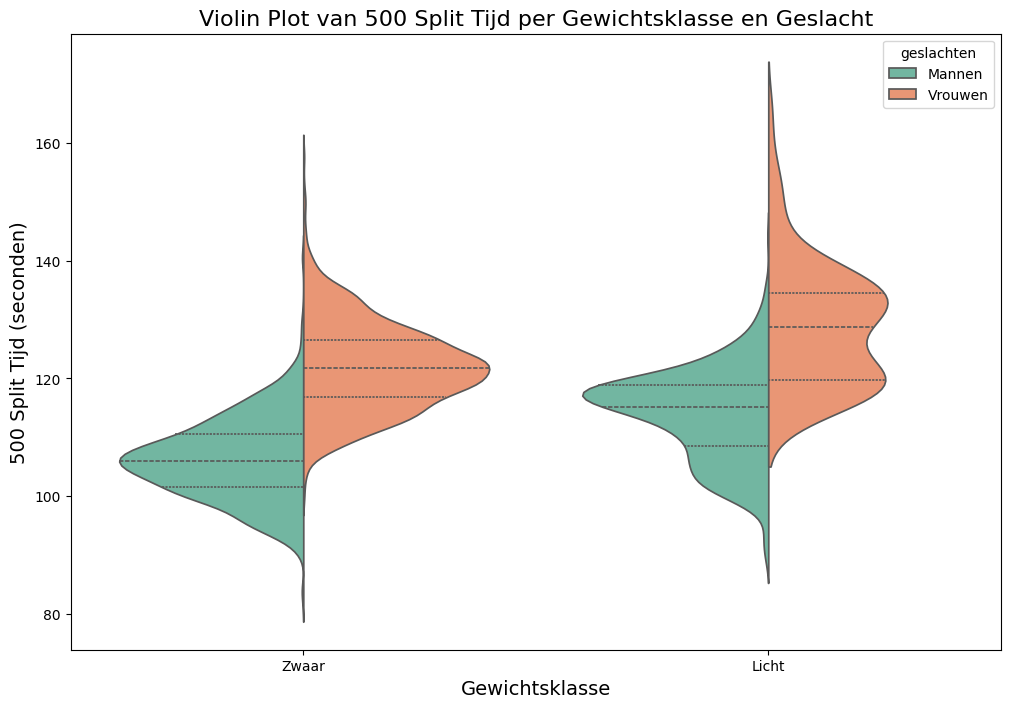

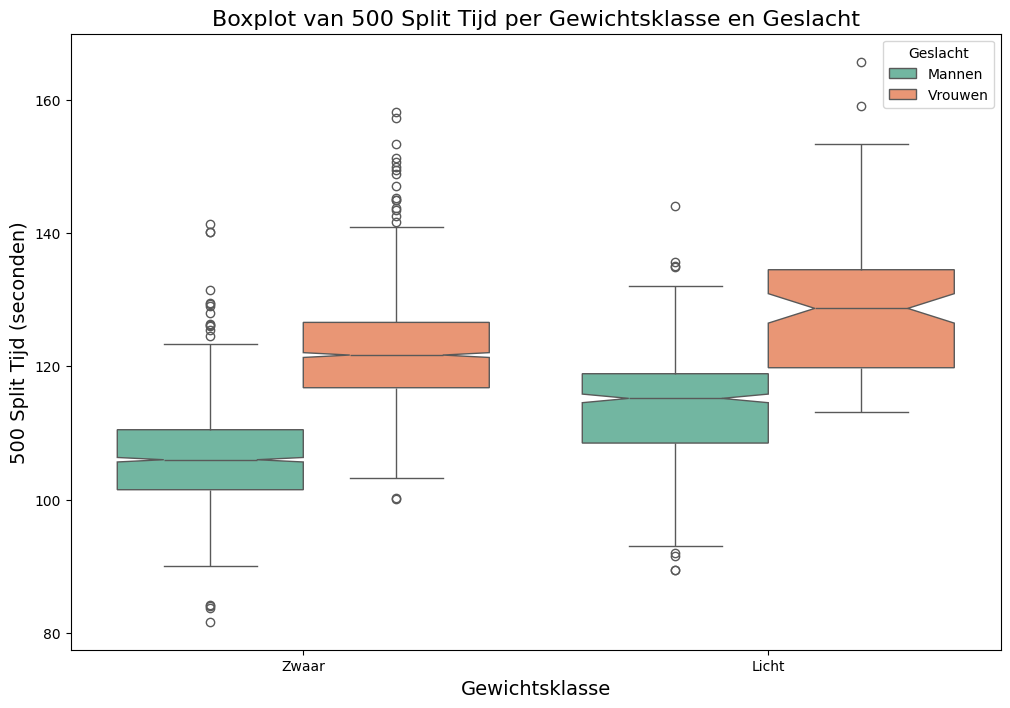

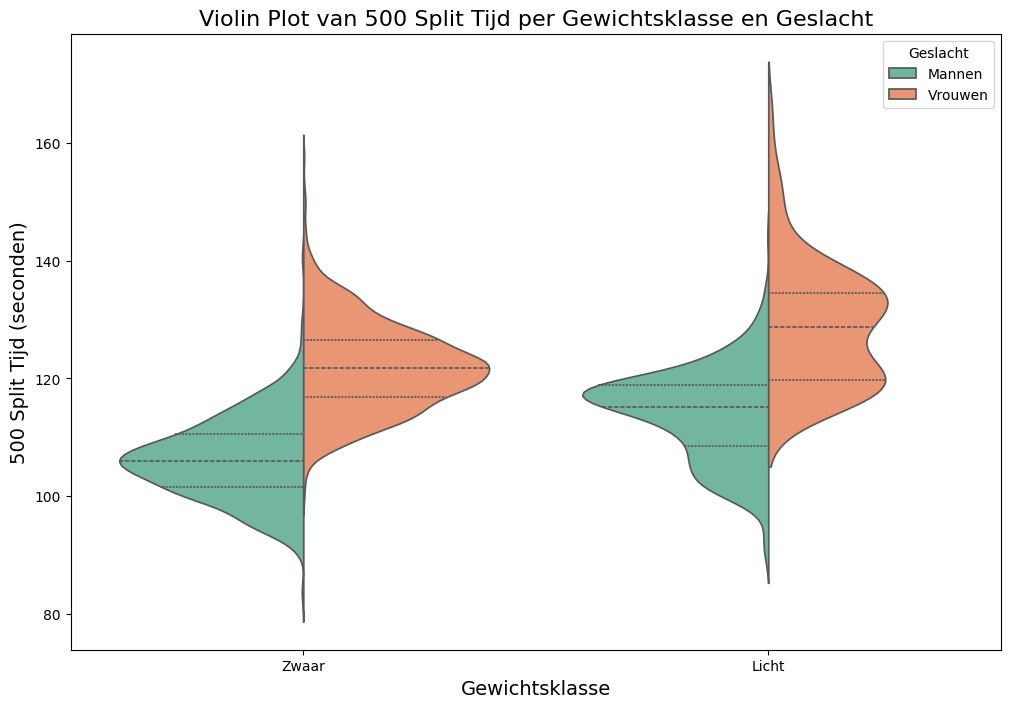

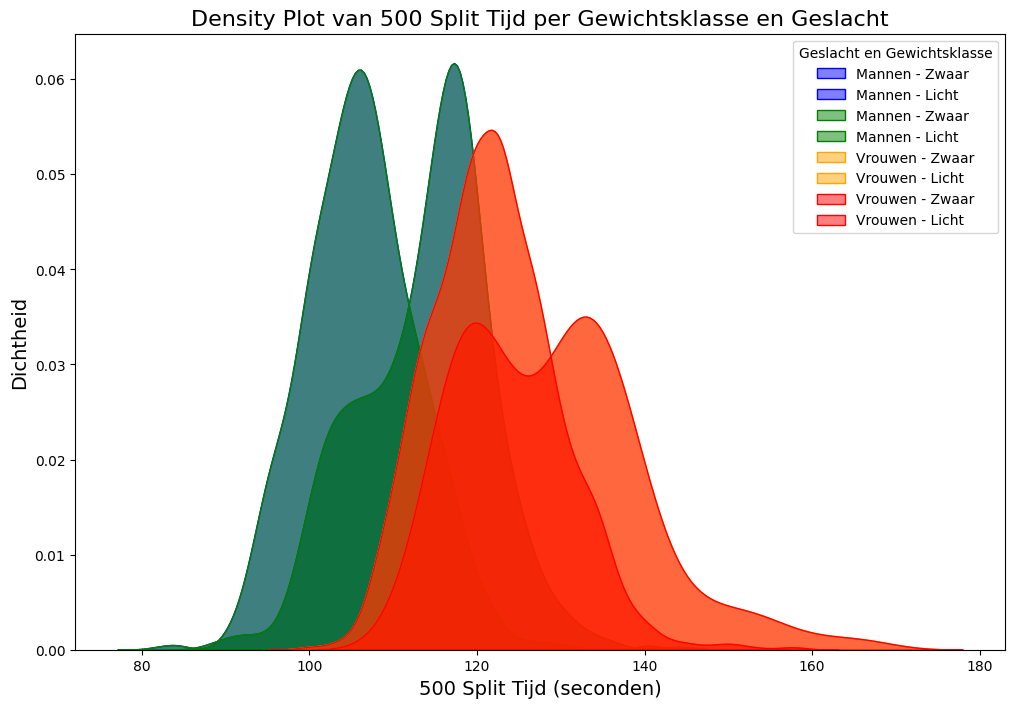

/tmp/ipykernel_8393/2185886451.py:92: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='groep', data=complete_df, palette='Set2')


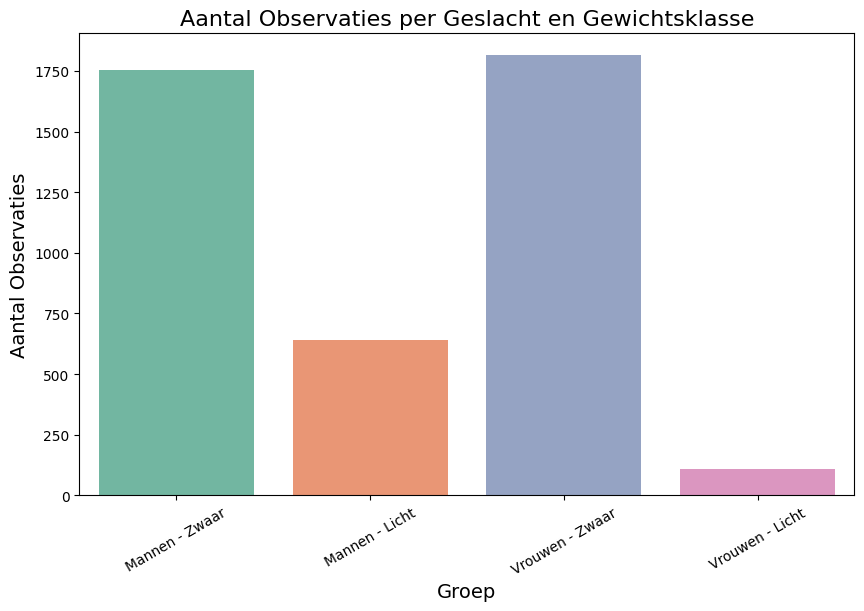

In [56]:
complete_df['geslachten'] = complete_df['binary_geslacht'].map({0: 'Mannen', 1: 'Vrouwen'})
complete_df['gewichten'] = complete_df['binary_gewichtsklasse'].map({0: 'Licht', 1: 'Zwaar'})

# BOXPLOT
plt.figure(figsize=(12, 8))

# Maak de boxplot met de gefilterde data voor Z en L per geslacht
sns.boxplot(x='gewichten', y='500_split', hue='geslachten', data=complete_df,
            palette='Set2', notch=True)

# Voeg titels en labels toe voor de boxplot
plt.title("Boxplot van 500 Split Tijd per Gewichtsklasse en Geslacht", fontsize=16)
plt.xlabel("Gewichtsklasse", fontsize=14)
plt.ylabel("500 Split Tijd (seconden)", fontsize=14)


# VIOLIN PLOT
plt.figure(figsize=(12, 8))

# Maak de violin plot voor de 500_split tijden per geslacht en gewichtsklasse
sns.violinplot(x='gewichten', y='500_split', hue='geslachten', data=complete_df,
               inner='quart', palette='Set2', split=True)

plt.title("Violin Plot van 500 Split Tijd per Gewichtsklasse en Geslacht", fontsize=16)
plt.xlabel("Gewichtsklasse", fontsize=14)
plt.ylabel("500 Split Tijd (seconden)", fontsize=14)

# ========== BOXPLOT ==========
plt.figure(figsize=(12, 8))

sns.boxplot(x='gewichten', 
            y='500_split', 
            hue='geslachten', 
            data=complete_df, 
            palette='Set2', 
            notch=True)

plt.title("Boxplot van 500 Split Tijd per Gewichtsklasse en Geslacht", fontsize=16)
plt.xlabel("Gewichtsklasse", fontsize=14)
plt.ylabel("500 Split Tijd (seconden)", fontsize=14)
plt.legend(title="Geslacht")
plt.show()

# ========== VIOLIN PLOT ==========
plt.figure(figsize=(12, 8))

sns.violinplot(x='gewichten', 
               y='500_split', 
               hue='geslachten', 
               data=complete_df, 
               inner='quart', 
               palette='Set2', 
               split=True)

plt.title("Violin Plot van 500 Split Tijd per Gewichtsklasse en Geslacht", fontsize=16)
plt.xlabel("Gewichtsklasse", fontsize=14)
plt.ylabel("500 Split Tijd (seconden)", fontsize=14)
plt.legend(title="Geslacht")
plt.show()

# ========== DENSITY PLOT ==========
plt.figure(figsize=(12, 8))

# Maak de density plot voor de 500_split tijden per geslacht en gewichtsklasse
for geslacht, kleur in zip([0, 0, 1, 1], ['blue', 'green', 'orange', 'red']):
    for gewichtsklasse in [1, 0]:
        subset = complete_df[(complete_df['binary_geslacht'] == geslacht) & 
                                        (complete_df['binary_gewichtsklasse'] == gewichtsklasse)]
        if not subset.empty:
            label = f"{'Mannen' if geslacht == 0 else 'Vrouwen'} - {'Zwaar' if gewichtsklasse == 1 else 'Licht'}"
            sns.kdeplot(data=subset['500_split'], label=label, fill=True, color=kleur, alpha=0.5)

plt.title("Density Plot van 500 Split Tijd per Gewichtsklasse en Geslacht", fontsize=16)
plt.xlabel("500 Split Tijd (seconden)", fontsize=14)
plt.ylabel("Dichtheid", fontsize=14)
plt.legend(title="Geslacht en Gewichtsklasse")
plt.show()

#dichtheid groepen

plt.figure(figsize=(10, 6))

# Zorg ervoor dat de kolommen numeriek zijn
complete_df['binary_geslacht'] = pd.to_numeric(complete_df['binary_geslacht'], errors='coerce')
complete_df['binary_gewichtsklasse'] = pd.to_numeric(complete_df['binary_gewichtsklasse'], errors='coerce')

# Maak een nieuwe kolom die beide variabelen combineert
complete_df['groep'] = complete_df['binary_geslacht'].map({0: 'Mannen', 1: 'Vrouwen'}) + " - " + \
                       complete_df['binary_gewichtsklasse'].map({0: 'Licht', 1: 'Zwaar'})

# Barplot met het aantal records per groep
sns.countplot(x='groep', data=complete_df, palette='Set2')

plt.title("Aantal Observaties per Geslacht en Gewichtsklasse", fontsize=16)
plt.xlabel("Groep", fontsize=14)
plt.ylabel("Aantal Observaties", fontsize=14)
plt.xticks(rotation=30)  # Rotatie voor betere leesbaarheid
plt.show()